# Baseline Model based on U-Net

In [1]:
import os
os.chdir("..")

## Training

In [2]:
from baseline.trainer import Trainer

trainer = Trainer()

Segmentation Models: using `tf.keras` framework.


In [10]:
model = trainer.get_model()
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, None, None,  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_34 (ZeroPadding2 (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d_34[0][0]          
____________________________________________________________________________________________

In [3]:
%time history = trainer.train_from_simple_dataloader(dataset_size=10, )

10/10 - 85s - loss: 1.5722 - iou_score: 0.1836 - val_loss: 1.4042 - val_iou_score: 0.1505
CPU times: user 5min 39s, sys: 2min 11s, total: 7min 51s
Wall time: 1min 31s


In [7]:
history.history['iou_score']

[0.18359003961086273]

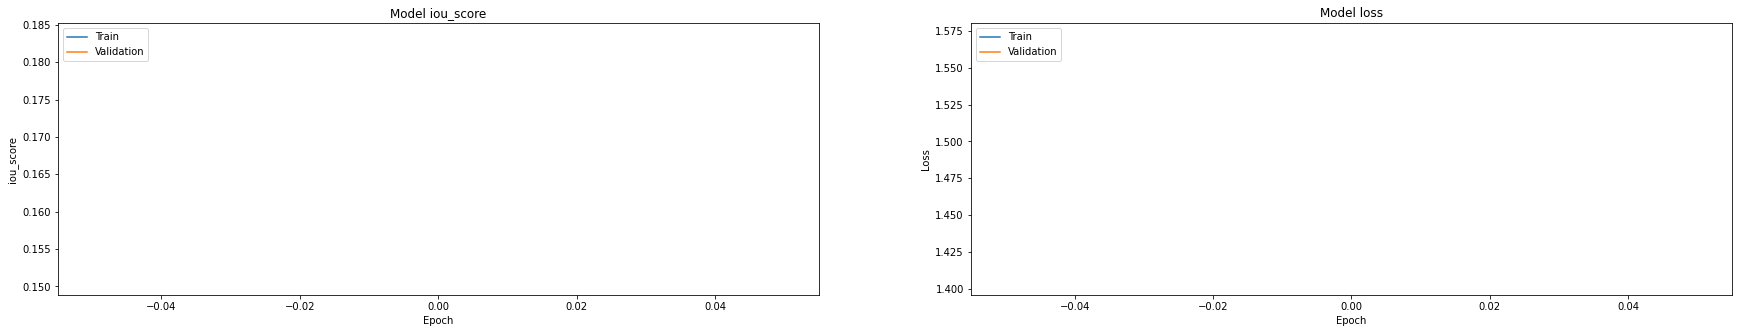

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Prediction

In [8]:
import segmentation_models as sm
from constants import TEST_DIR
from baseline.dataloader import SimpleDataLoader
from baseline.data_augmentation import DataAugmentation
from baseline.helper import Visualisation

simple_data_loader = SimpleDataLoader(
    images_path=os.path.join(TEST_DIR, "images"),
    preprocessing=DataAugmentation().get_preprocessing(sm.get_preprocessing(Trainer.BACKBONE)),
    size=10
)

test_images = simple_data_loader.get_images()

(1024, 768, 3)
(1, 1024, 768, 3)


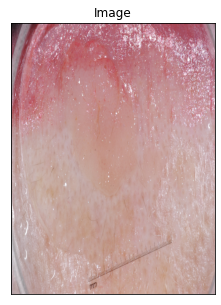

In [27]:
import numpy as np

test_image = test_images[0]

print(test_image.shape)
test_image = np.expand_dims(test_image, axis=0)  # add batch dimension
print(test_image.shape)

Visualisation().show(image=test_image.squeeze())

In [28]:
predicted_mask = model.predict(test_image).round()
print(predicted_mask.shape)

(1, 1024, 768, 1)


In [36]:
predicted_mask[..., 0].shape

(1, 1024, 768)

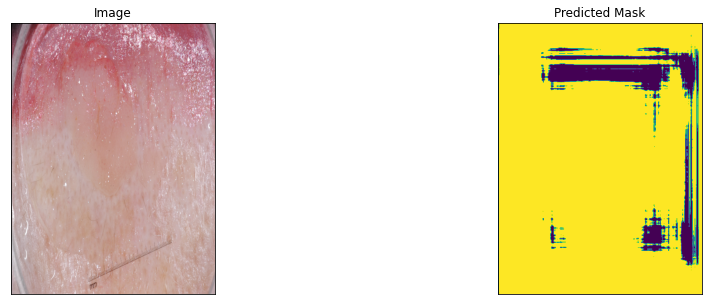

In [32]:
Visualisation().show(
    image=test_image.squeeze(),
    predicted_mask=predicted_mask[..., 0].squeeze()
)

(1, 1024, 768, 3)
(1, 1024, 768, 1)


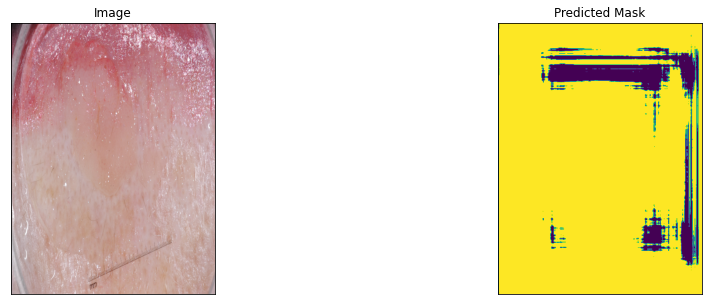

(1, 1024, 768, 3)
(1, 1024, 768, 1)


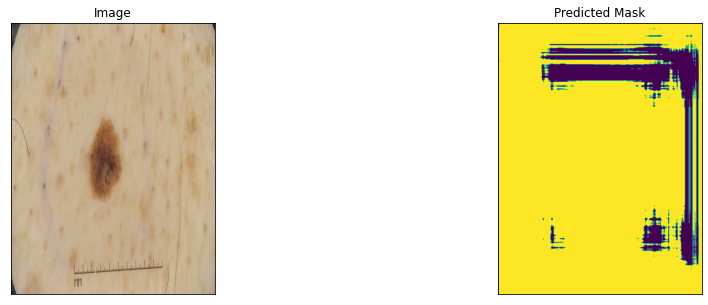

(1, 1024, 768, 3)
(1, 1024, 768, 1)


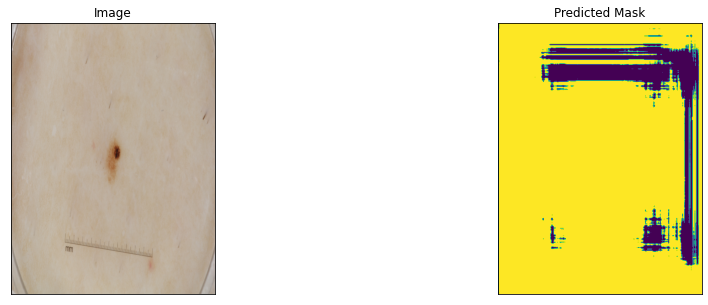

In [38]:
for test_image in simple_data_loader.get_images()[:3]:
    test_image = np.expand_dims(test_image, axis=0)
    print(test_image.shape)
    predicted_mask = model.predict(test_image).round()
    print(predicted_mask.shape)
    
    Visualisation().show(
        image=test_image.squeeze(),
        predicted_mask=predicted_mask[..., 0].squeeze()
    )